In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries are installed successfully!")


Libraries are installed successfully!


In [3]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For beautiful statistical plots

# Load the dataset 
file_path = r"C:\Users\Anastasiia\Documents\GitHub\churn_prediction\data\BankChurners.csv"  
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777

General information about the data

In [4]:
# Check the shape of the dataset (number of rows and columns)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# General information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Summary statistics for numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())



The dataset has 10127 rows and 23 columns.

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gende

Deleting of unnecessary columns

In [5]:
# Dropping two unnecessary columns
columns_to_drop = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]

# Check if columns exist in the dataset before dropping
for col in columns_to_drop:
    if col in df.columns:
        print(f"Dropping column: {col}")
    else:
        print(f"Column {col} not found in the dataset.")

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Confirm columns are removed
print("\nRemaining columns after dropping:")
print(df.columns)


Dropping column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Dropping column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

Remaining columns after dropping:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


Checking for missing values


Missing values in each column:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


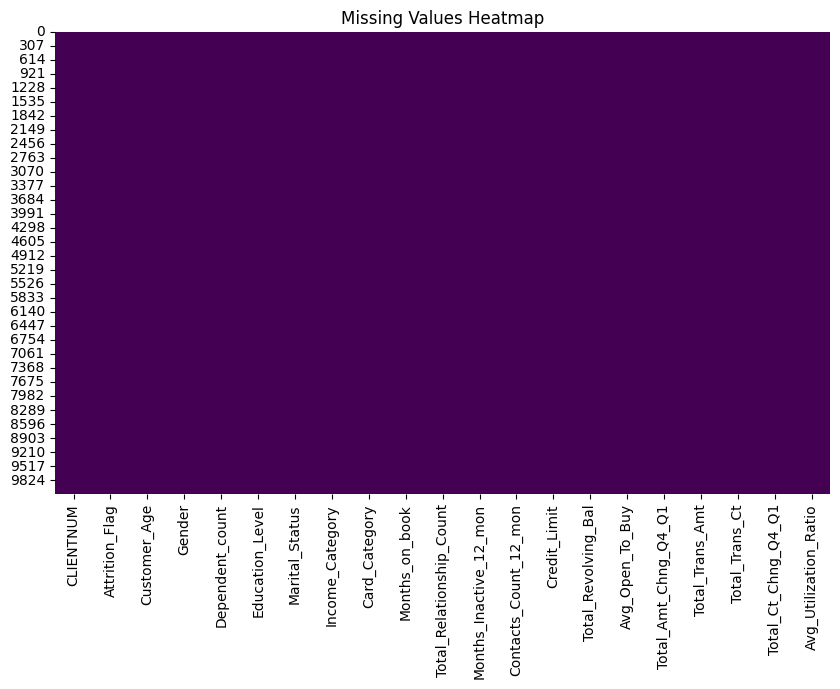

In [6]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Find anomalies (outliers)

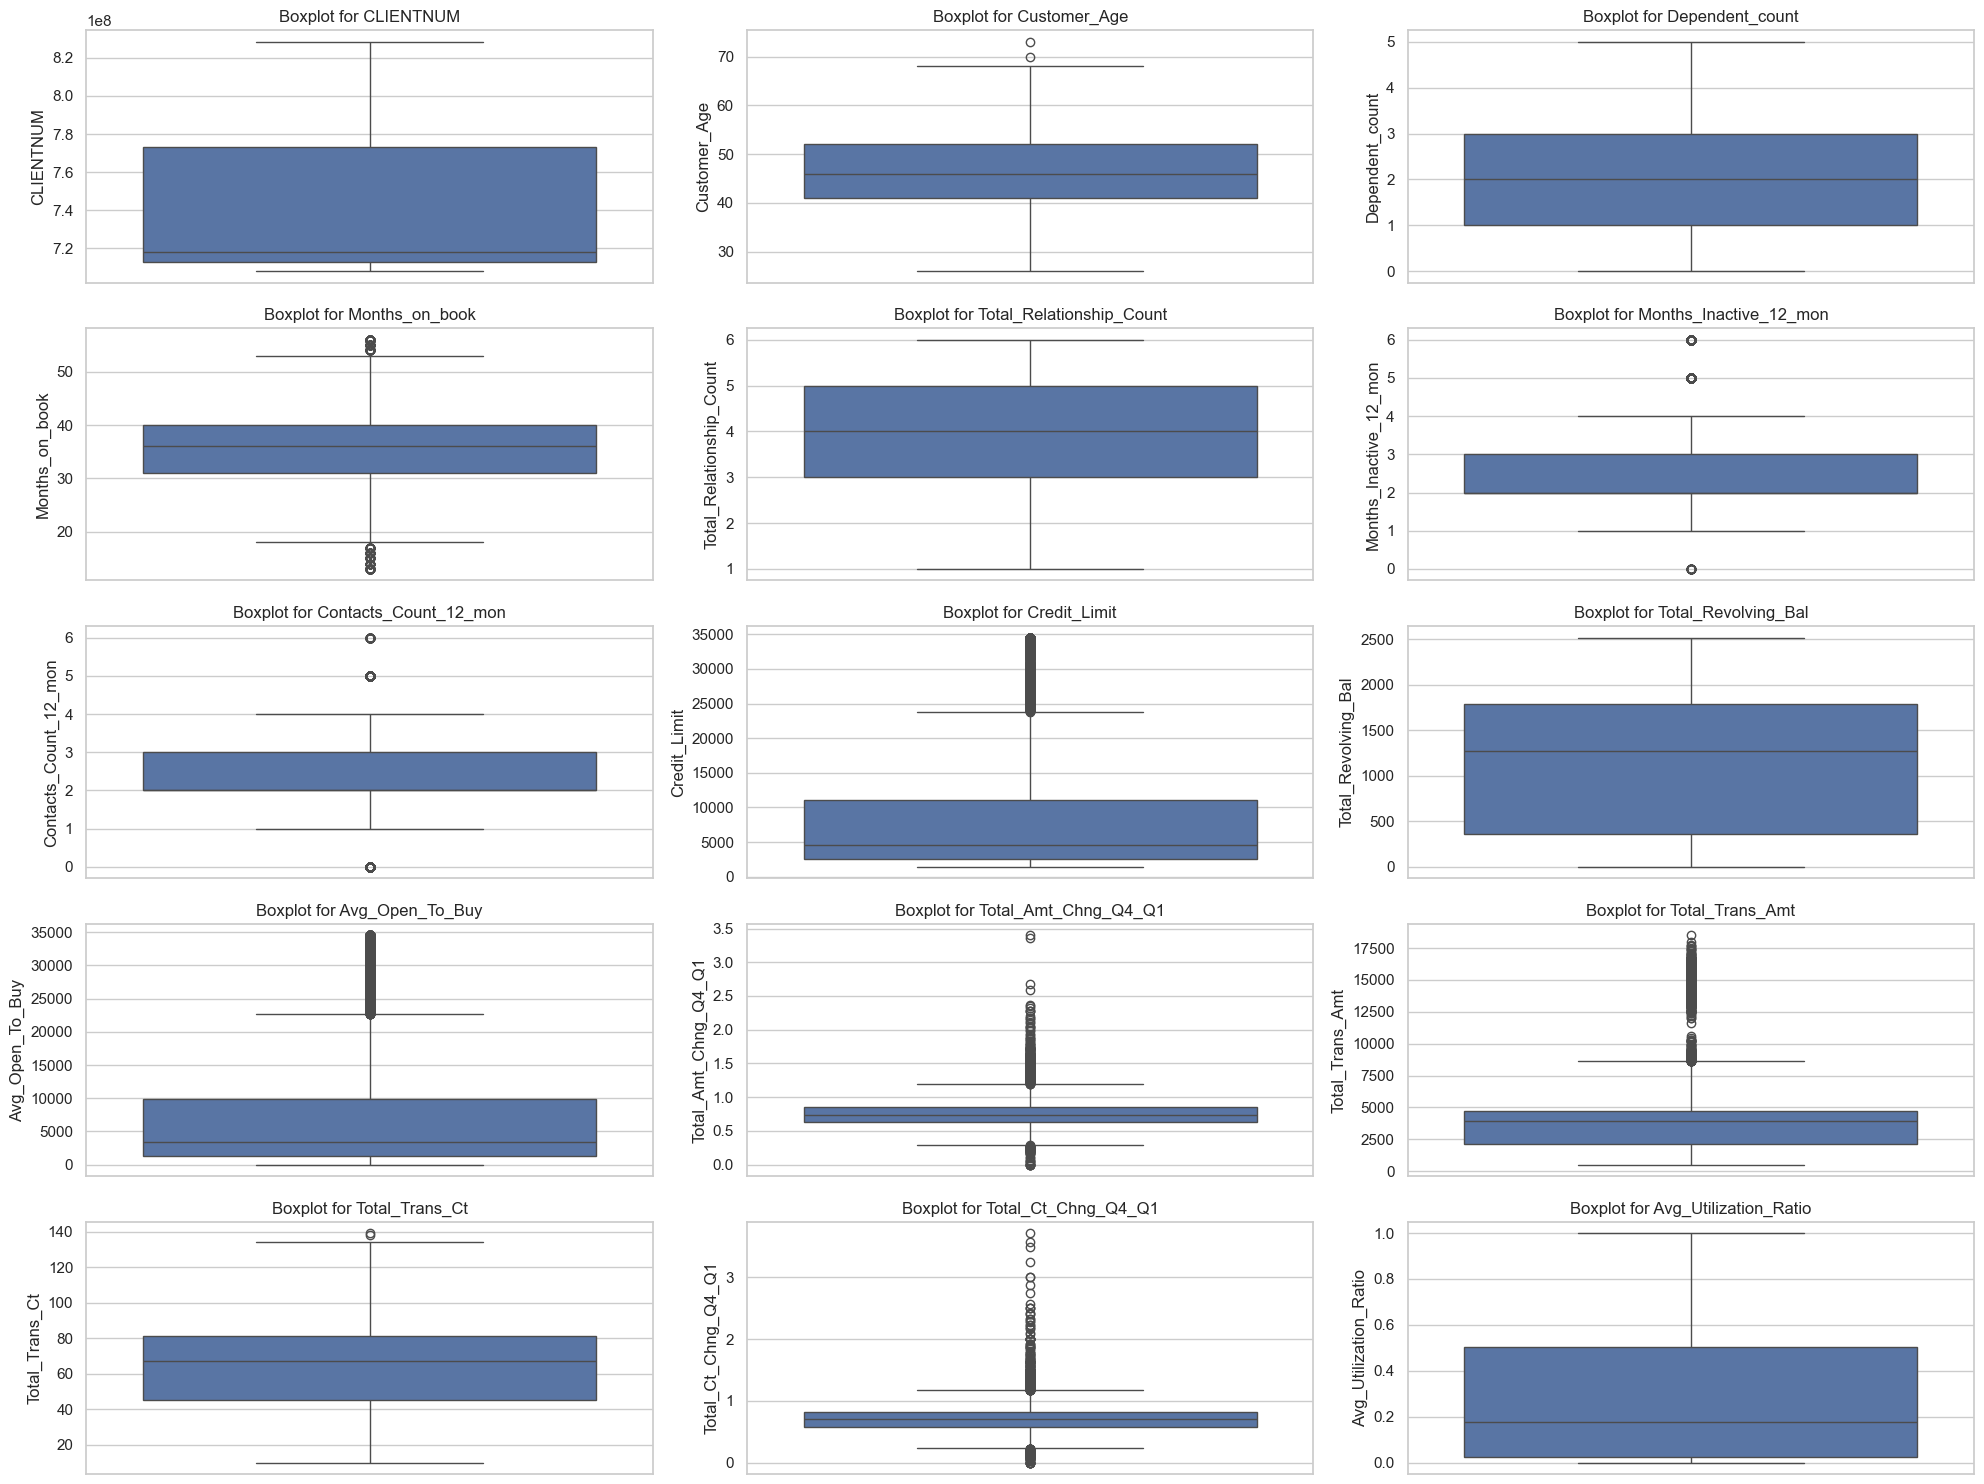

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set(style="whitegrid")

# Select numerical columns from the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Set the figure size for all boxplots
plt.figure(figsize=(20, 15))

# Loop through all numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i + 1)  # Create a grid with 3 plots per row
    sns.boxplot(y=df[col])  # Create a boxplot for the column
    plt.title(f"Boxplot for {col}")  # Add a title for each boxplot
    plt.xlabel('')  # Remove x-axis labels for cleaner visuals

# Automatically adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


Processing Anomalies

Anomalies are defined as values that fall outside 1.5 * IQR (Interquartile Range).



In [8]:
# Function to detect and display outliers using IQR method
def detect_outliers_iqr(dataframe, column):
    """
    Detect and display outliers for a specific column using the IQR method.
    """
    Q1 = dataframe[column].quantile(0.25)  # First quartile
    Q3 = dataframe[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nOutliers in '{column}' outside range ({lower_bound:.2f}, {upper_bound:.2f}):")
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    print(outliers[[column]])
    print(f"Total outliers: {len(outliers)}")
    
    return outliers

# Detect outliers for selected numerical columns
columns_to_check = ['Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
for col in columns_to_check:
    detect_outliers_iqr(df, col)



Outliers in 'Credit_Limit' outside range (-10213.75, 23836.25):
       Credit_Limit
6           34516.0
7           29081.0
16          30367.0
40          32426.0
45          34516.0
...             ...
10098       34516.0
10100       29808.0
10104       29663.0
10110       34516.0
10112       34516.0

[984 rows x 1 columns]
Total outliers: 984

Outliers in 'Total_Trans_Amt' outside range (-1722.75, 8619.25):
       Total_Trans_Amt
8591              8693
8650              8947
8670              8854
8708              8796
8734              8778
...                ...
10121            14596
10122            15476
10123             8764
10124            10291
10126            10294

[896 rows x 1 columns]
Total outliers: 896

Outliers in 'Avg_Utilization_Ratio' outside range (-0.70, 1.22):
Empty DataFrame
Columns: [Avg_Utilization_Ratio]
Index: []
Total outliers: 0


Total_Trans_Amt 896 (This indicates active customers with high purchasing power.)

Credit_Limit 984 (These can be VIP clients or clients with high credit potential.)

Investigating the relationship between Credit_Limit and Avg_Utilization_Ratio
(Leave the anomalies for analysis.)

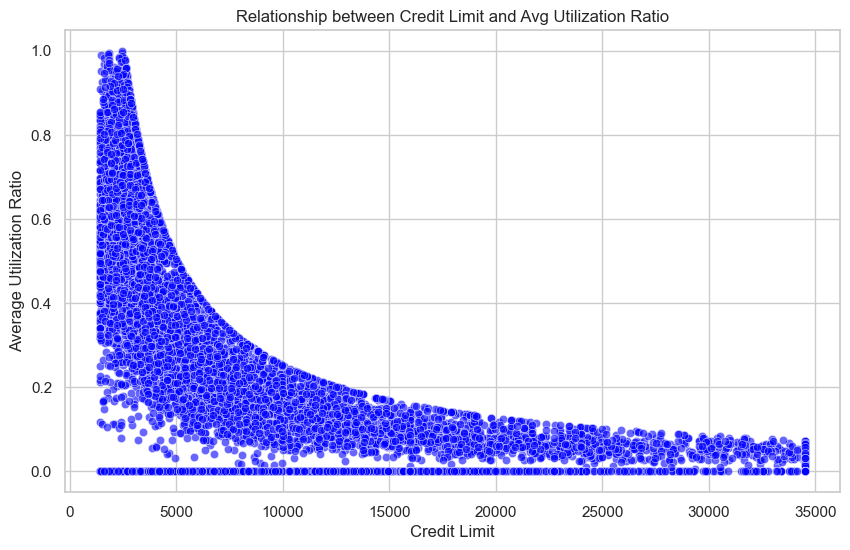

Correlation between Credit_Limit and Avg_Utilization_Ratio: -0.48


In [10]:
# Scatter plot to analyze the relationship between Credit_Limit and Avg_Utilization_Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit_Limit', y='Avg_Utilization_Ratio', data=df, alpha=0.6, color="blue")
plt.title("Relationship between Credit Limit and Avg Utilization Ratio")
plt.xlabel("Credit Limit")
plt.ylabel("Average Utilization Ratio")
plt.show()

# Calculate the correlation
correlation = df['Credit_Limit'].corr(df['Avg_Utilization_Ratio'])
print(f"Correlation between Credit_Limit and Avg_Utilization_Ratio: {correlation:.2f}")


Negative correlation:

As Credit_Limit increases, Avg_Utilization_Ratio decreases.
This means that customers with a higher credit limit tend to use a lower percentage of their available credit.

High Avg_Utilization_Ratio values:
They are mainly observed in customers with a low credit limit (less than 5000).
This indicates a high credit limit burden among customers with little available credit.

Low Avg_Utilization_Ratio values:
Prefer customers with a high credit limit (over 10,000).
This indicates that such customers use credit more carefully or have less need to use it.

Credit_Limit_Segment – визначає сегмент для Credit_Limit:

Low (0 - 5000)
Medium (5000 - 15000)
High (15000+)
Utilization_Segment – визначає сегмент для Avg_Utilization_Ratio:

Low (0 - 0.2)
Medium (0.2 - 0.6)
High (0.6 - 1.0)

In [14]:
# Segment 'Credit_Limit' into bins (Low, Medium, High)
credit_bins = [0, 5000, 15000, df['Credit_Limit'].max()]  # Define bin edges
credit_labels = ['Low', 'Medium', 'High']  # Define labels
df['Credit_Limit_Segment'] = pd.cut(df['Credit_Limit'], bins=credit_bins, labels=credit_labels)

# Segment 'Avg_Utilization_Ratio' into bins (Low, Medium, High)
util_bins = [0, 0.2, 0.6, 1.0]  # Define bin edges
util_labels = ['Low', 'Medium', 'High']  # Define labels
df['Utilization_Segment'] = pd.cut(
    df['Avg_Utilization_Ratio'], 
    bins=util_bins, 
    labels=util_labels, 
    include_lowest=True,  # Include the lowest value in the first bin
    right=True  # Include the right edge in the bin
)

# Display updated data to confirm
print("Updated data with segmentation:")
print(df[['Credit_Limit', 'Credit_Limit_Segment', 'Avg_Utilization_Ratio', 'Utilization_Segment']].head())


Updated data with segmentation:
   Credit_Limit Credit_Limit_Segment  Avg_Utilization_Ratio  \
0       12691.0               Medium                  0.061   
1        8256.0               Medium                  0.105   
2        3418.0                  Low                  0.000   
3        3313.0                  Low                  0.760   
4        4716.0                  Low                  0.000   

  Utilization_Segment  
0                 Low  
1                 Low  
2                 Low  
3                High  
4                 Low  


In [16]:
# Group by Credit_Limit_Segment and Utilization_Segment
segment_counts = df.groupby(['Credit_Limit_Segment', 'Utilization_Segment']).size().reset_index(name='Count')

# Display the counts
print("Customer segmentation based on Credit Limit and Utilization Ratio:")
print(segment_counts)

# Correct pivot table syntax
pivot_table = segment_counts.pivot(index='Credit_Limit_Segment', columns='Utilization_Segment', values='Count')

# Display the pivot table
print("\nPivot Table:")
print(pivot_table)



Customer segmentation based on Credit Limit and Utilization Ratio:
  Credit_Limit_Segment Utilization_Segment  Count
0                  Low                 Low   1511
1                  Low              Medium   2046
2                  Low                High   1802
3               Medium                 Low   2022
4               Medium              Medium    933
5               Medium                High      0
6                 High                 Low   1813
7                 High              Medium      0
8                 High                High      0

Pivot Table:
Utilization_Segment    Low  Medium  High
Credit_Limit_Segment                    
Low                   1511    2046  1802
Medium                2022     933     0
High                  1813       0     0


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_13656\3946546326.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = df.groupby(['Credit_Limit_Segment', 'Utilization_Segment']).size().reset_index(name='Count')


Low Credit Limit customers are more likely to use a high credit limit.

Medium and High Credit Limit groups have a stable financial behavior with a low utilization ratio.

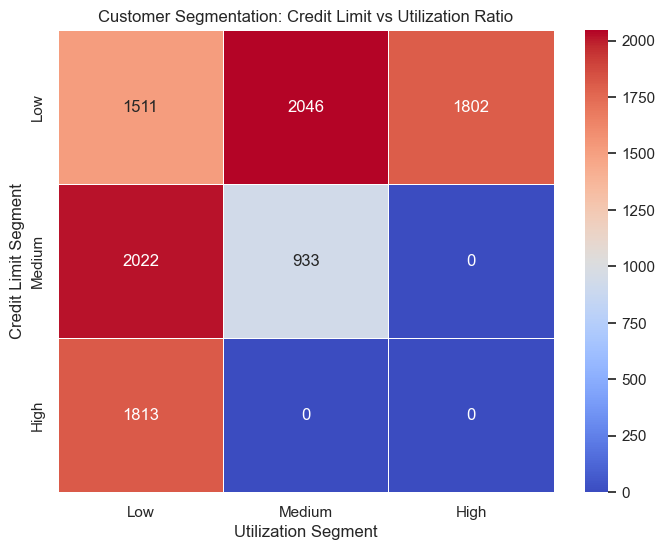

In [17]:
# Visualize the segmentation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)
plt.title("Customer Segmentation: Credit Limit vs Utilization Ratio")
plt.xlabel("Utilization Segment")
plt.ylabel("Credit Limit Segment")
plt.show()


Low Utilization Клієнти з низьким кредитним лімітом мають високий ризик відтоку, особливо група з High Utilization.

Medium Credit Limit: Клієнти з середнім лімітом майже не використовують весь доступний кредит, що говорить про менший ризик.

High Credit Limit Клієнти з високим лімітом мають найнижчий коефіцієнт використання, що свідчить про фінансову стабільність.

Additional analysis of risk groups

In [18]:
# Filter the risky group: Low Credit Limit + High Utilization Ratio
risky_group = df[(df['Credit_Limit_Segment'] == 'Low') & (df['Utilization_Segment'] == 'High')]

# Check the size of the group
print(f"Number of customers in the risky group: {risky_group.shape[0]}")

# Display the first 5 rows of the risky group
print("\nFirst 5 rows of the risky group:")
print(risky_group[['Customer_Age', 'Total_Trans_Ct']].head())


Number of customers in the risky group: 1802

First 5 rows of the risky group:
    Customer_Age  Total_Trans_Ct
3             40              20
18            61              30
23            47              23
30            53              25
31            53              26


Age distribution in the risk group

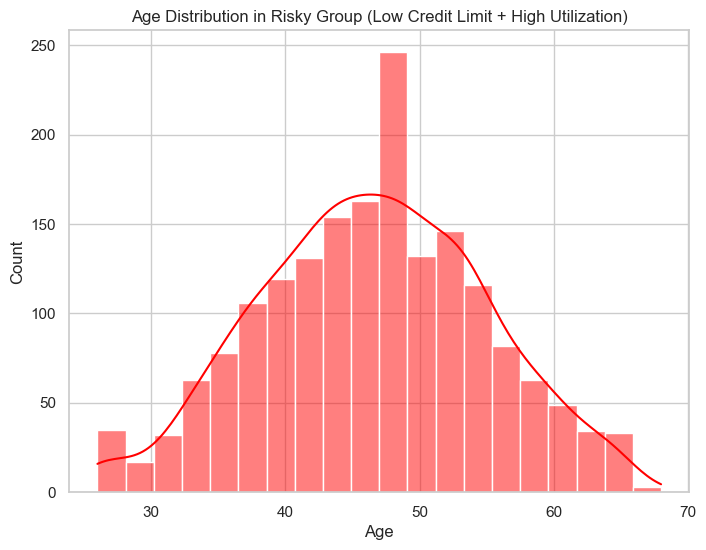

In [19]:
# Plot the age distribution for the risky group
plt.figure(figsize=(8, 6))
sns.histplot(risky_group['Customer_Age'], bins=20, kde=True, color='red')
plt.title("Age Distribution in Risky Group (Low Credit Limit + High Utilization)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Main observations:

Most of the clients in the risk group are in the age range of 35–55 years.

The largest peak (mode) is observed at the level of approximately 50 years.

Younger clients (up to 30 years old) and older ones (over 60 years old) are less common.

So 

Customers in the age group of 35-55 years are the main group with Low Credit Limit and High Utilization Ratio.
This can indicate financial stress in middle age, when expenses increase significantly.

Distribution of the number of transactions (Total_Trans_Ct)

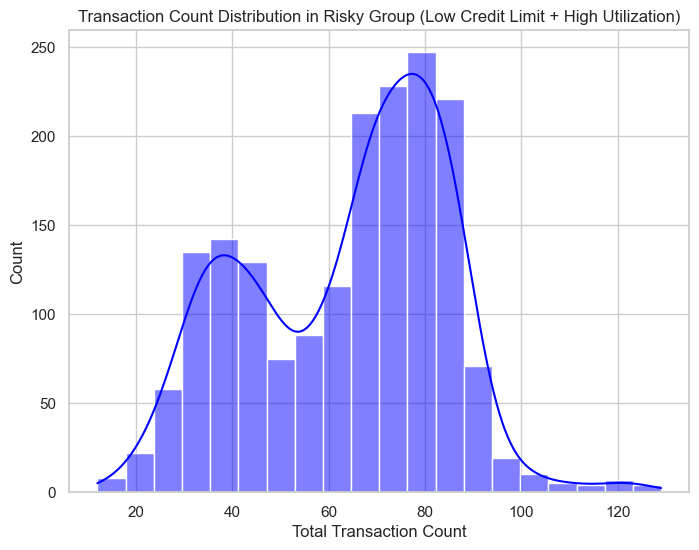

In [20]:
# Plot the transaction count distribution for the risky group
plt.figure(figsize=(8, 6))
sns.histplot(risky_group['Total_Trans_Ct'], bins=20, kde=True, color='blue')
plt.title("Transaction Count Distribution in Risky Group (Low Credit Limit + High Utilization)")
plt.xlabel("Total Transaction Count")
plt.ylabel("Count")
plt.show()


Conclusions

Age:
The majority of customers are aged 35–55, with a peak in their 50s.

Number of transactions:
The distribution of transactions is bimodal, with a peak at 80 transactions.
This indicates a high financial activity among a significant part of clients.

NEXT STEP

To investigate Total_Trans_Amt (загальна сума транзакцій) пов'язана з високим використанням кредитного ліміту у ризикованій групі (Low Credit Limit + High Utilization Ratio).

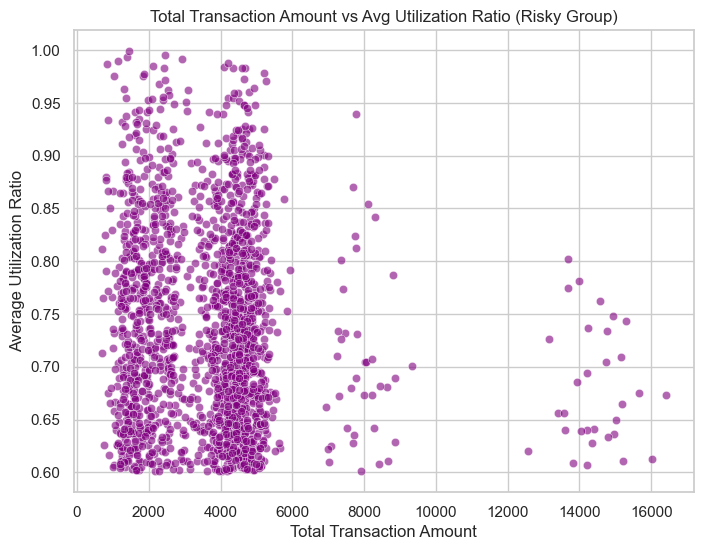

In [21]:
# Scatter plot to analyze the relationship between Total_Trans_Amt and Avg_Utilization_Ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total_Trans_Amt', 
    y='Avg_Utilization_Ratio', 
    data=risky_group, 
    color='purple', 
    alpha=0.6
)
plt.title("Total Transaction Amount vs Avg Utilization Ratio (Risky Group)")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Average Utilization Ratio")
plt.show()


In [22]:
# Calculate correlation between Total_Trans_Amt and Avg_Utilization_Ratio
correlation = risky_group['Total_Trans_Amt'].corr(risky_group['Avg_Utilization_Ratio'])
print(f"Correlation between Total_Trans_Amt and Avg_Utilization_Ratio: {correlation:.2f}")


Correlation between Total_Trans_Amt and Avg_Utilization_Ratio: -0.11


URSONC

Correlation between Total_Trans_Ct and Total_Trans_Amt: 0.80


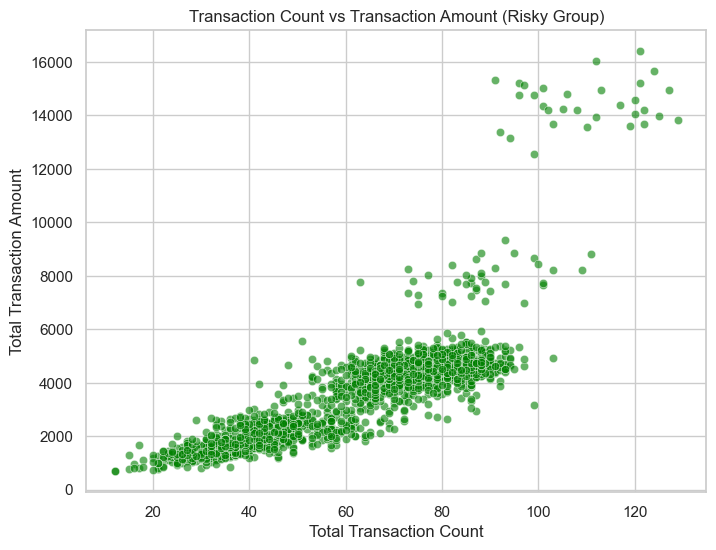

In [23]:
# Calculate correlation between Total_Trans_Ct and Total_Trans_Amt
correlation_ct_amt = risky_group['Total_Trans_Ct'].corr(risky_group['Total_Trans_Amt'])
print(f"Correlation between Total_Trans_Ct and Total_Trans_Amt: {correlation_ct_amt:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total_Trans_Ct', 
    y='Total_Trans_Amt', 
    data=risky_group, 
    color='green', 
    alpha=0.6
)
plt.title("Transaction Count vs Transaction Amount (Risky Group)")
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")
plt.show()


In [25]:
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']


In [ ]:
df = df.drop(columns=['Total_Trans_Amt'])  #  Total_Trans_Ct


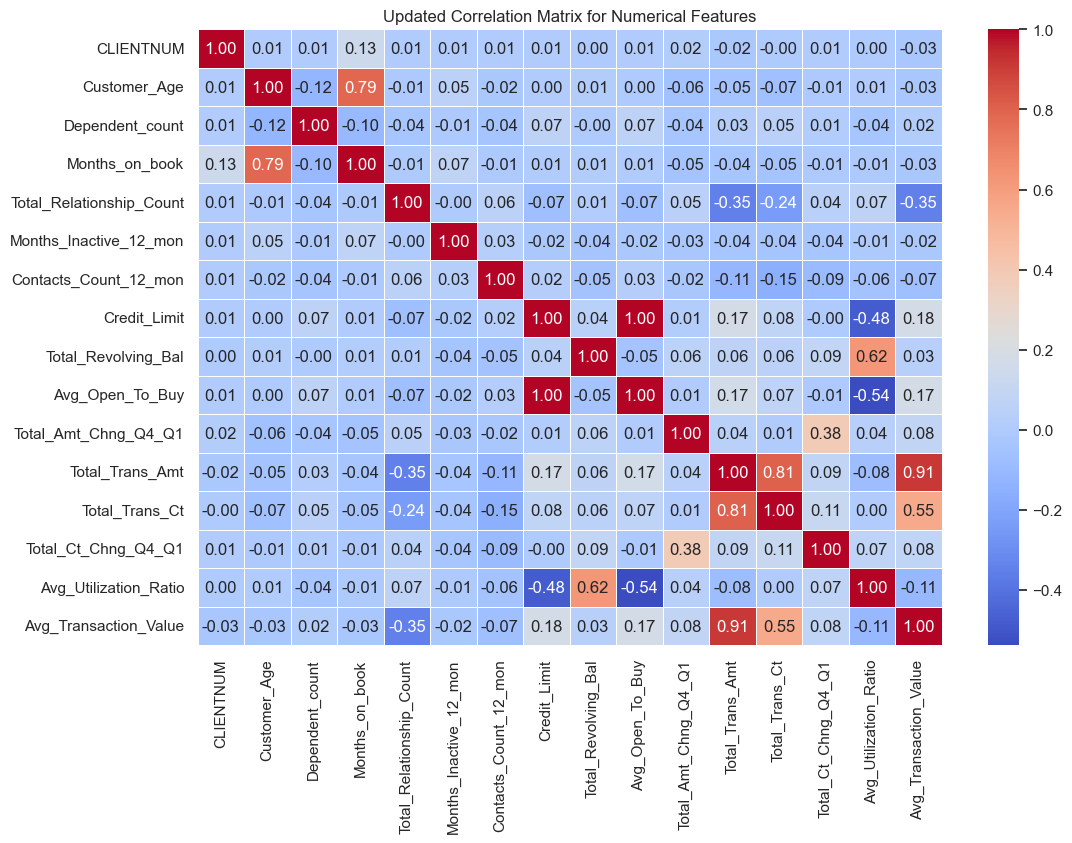

In [27]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix for Numerical Features")
plt.show()



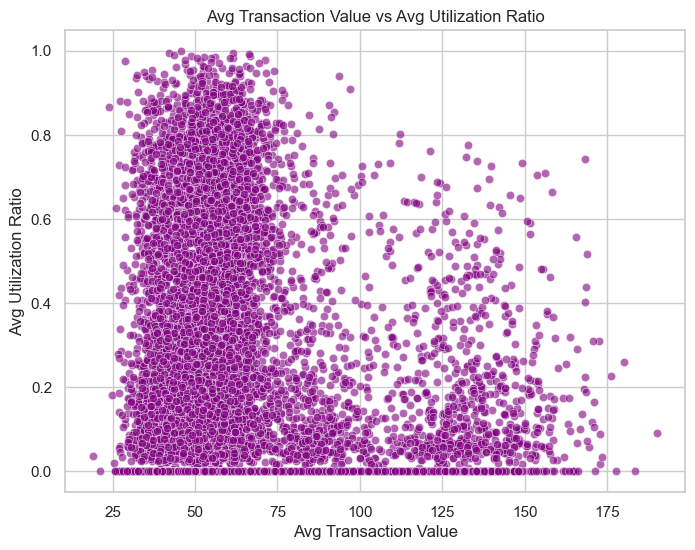

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Transaction_Value', y='Avg_Utilization_Ratio', data=df, color='purple', alpha=0.6)
plt.title("Avg Transaction Value vs Avg Utilization Ratio")
plt.xlabel("Avg Transaction Value")
plt.ylabel("Avg Utilization Ratio")
plt.show()


Якщо загальна сума транзакцій (Total_Trans_Amt) є важливішою характеристикою для бізнесу (наприклад, загальний дохід), то Total_Trans_Ct можна дропнути.

In [29]:
df = df.drop(columns=['Total_Trans_Ct'])
print("Dropped 'Total_Trans_Ct', retained 'Total_Trans_Amt'")


Dropped 'Total_Trans_Ct', retained 'Total_Trans_Amt'


 Petra

In [30]:
# Drop the redundant feature
df = df.drop(columns=['Avg_Open_To_Buy'])

# Confirm the remaining columns
print("Remaining columns after dropping Avg_Open_To_Buy:")
print(df.columns)


Remaining columns after dropping Avg_Open_To_Buy:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Credit_Limit_Segment', 'Utilization_Segment',
       'Avg_Transaction_Value'],
      dtype='object')


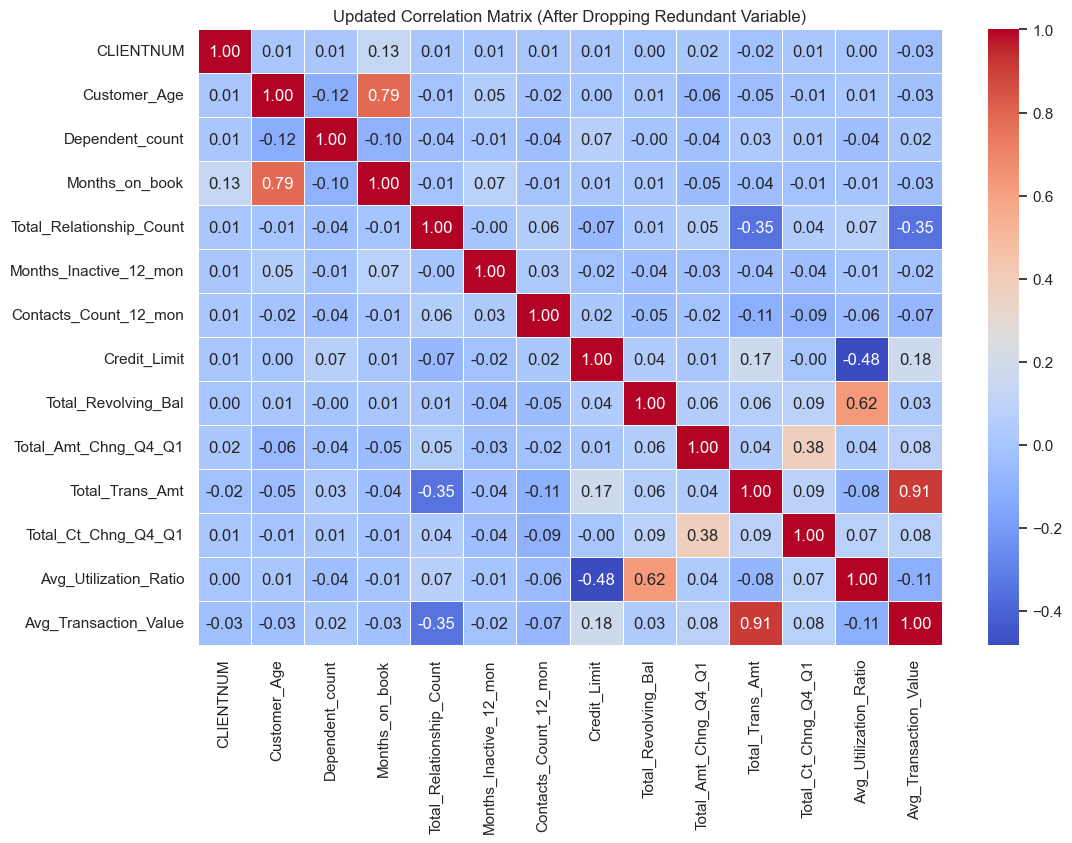

In [31]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Recalculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix (After Dropping Redundant Variable)")
plt.show()


In [33]:
# Drop the Avg_Transaction_Value column
df = df.drop(columns=['Avg_Transaction_Value'])

# Confirm the drop
print("Remaining columns after dropping 'Avg_Transaction_Value':")
print(df.columns)



Remaining columns after dropping 'Avg_Transaction_Value':
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Credit_Limit_Segment', 'Utilization_Segment'],
      dtype='object')


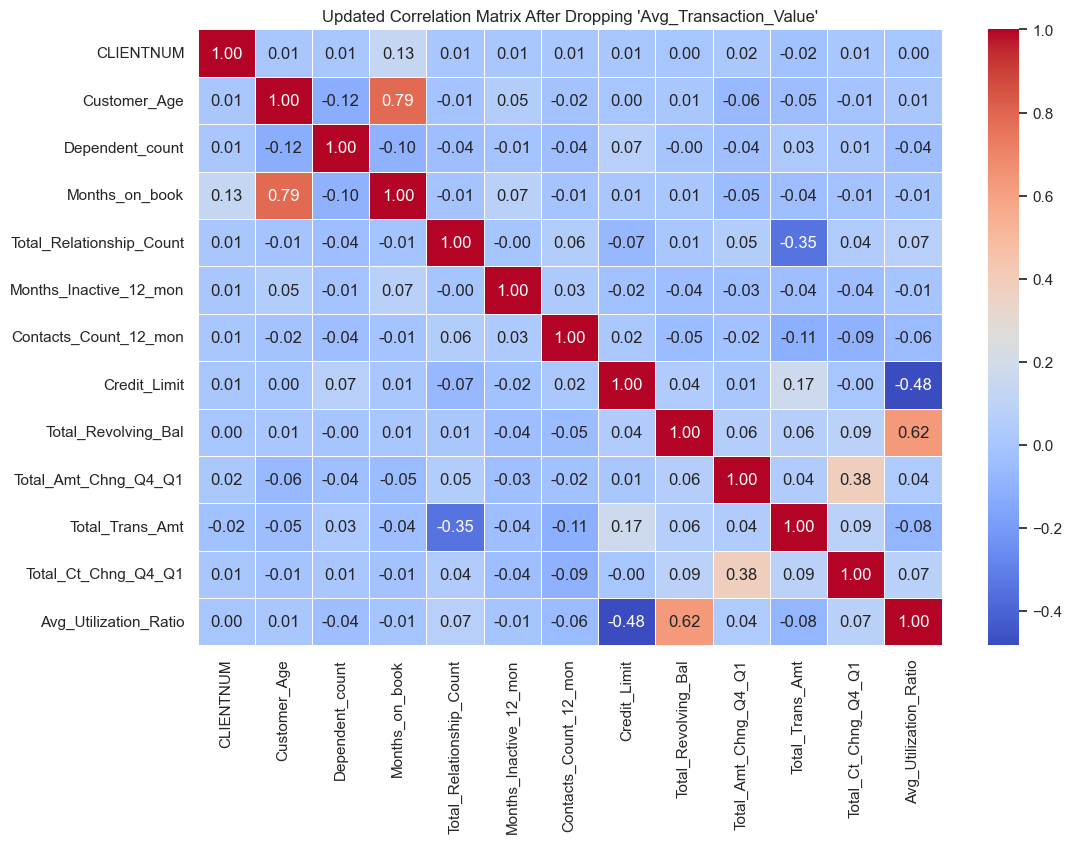

In [34]:
# Recalculate correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix After Dropping 'Avg_Transaction_Value'")
plt.show()


In [43]:
# Check the data types of features
print(X.dtypes)

# Identify columns with object (string) type
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


CLIENTNUM                      int64
Customer_Age                   int64
Gender                        object
Dependent_count                int64
Education_Level               object
Marital_Status                object
Income_Category               object
Card_Category                 object
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
Credit_Limit_Segment        category
Utilization_Segment         category
dtype: object
Categorical Columns: Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [44]:
from sklearn.preprocessing import OneHotEncoder

# Perform One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop_first avoids dummy variable trap

# Confirm the encoding
print("Encoded Features:")
print(X_encoded.head())


Encoded Features:
   CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  ...  \
0       12691.0                  777                 1.335  ...   


STEP 1 Build a RandomForest model
Під час моделювання (наприклад, з використанням Random Forest чи XGBoost) можна оцінити Feature Importance для обох фіч

In [45]:
# Split the data again after encoding
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9323790720631787

Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.92      0.64      0.75       327
Existing Customer       0.93      0.99      0.96      1699

         accuracy                           0.93      2026
        macro avg       0.93      0.81      0.86      2026
     weighted avg       0.93      0.93      0.93      2026



STEP 2 Assessment of the importance of features

In [50]:
# Get feature importance from the trained Random Forest model
importances = pd.DataFrame({
    'Feature': X_train.columns,  # Use X_train.columns for feature names
    'Importance': rf_model.feature_importances_  # Retrieve feature importances
}).sort_values(by='Importance', ascending=False)  # Sort in descending order

# Display the importance values
print("Feature Importance:")
print(importances)

# Visualize the feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [51]:
# Check if the model is trained
print("Is model fitted?:", hasattr(rf_model, 'estimators_'))


Is model fitted?: False


In [55]:
# Step 1: Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Step 2: One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)  # One-Hot Encode train data
X_test_encoded = pd.get_dummies(X_test, drop_first=True)    # One-Hot Encode test data

# Step 3: Align columns in X_test_encoded with X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Step 5: Get predictions
y_pred = rf_model.predict(X_test_encoded)

# Step 6: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Categorical Columns: Index([], dtype='object')
Accuracy: 0.9402764067127345

Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.91      0.70      0.79       327
Existing Customer       0.95      0.99      0.97      1699

         accuracy                           0.94      2026
        macro avg       0.93      0.84      0.88      2026
     weighted avg       0.94      0.94      0.94      2026



C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_13656\1830587712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette="viridis")


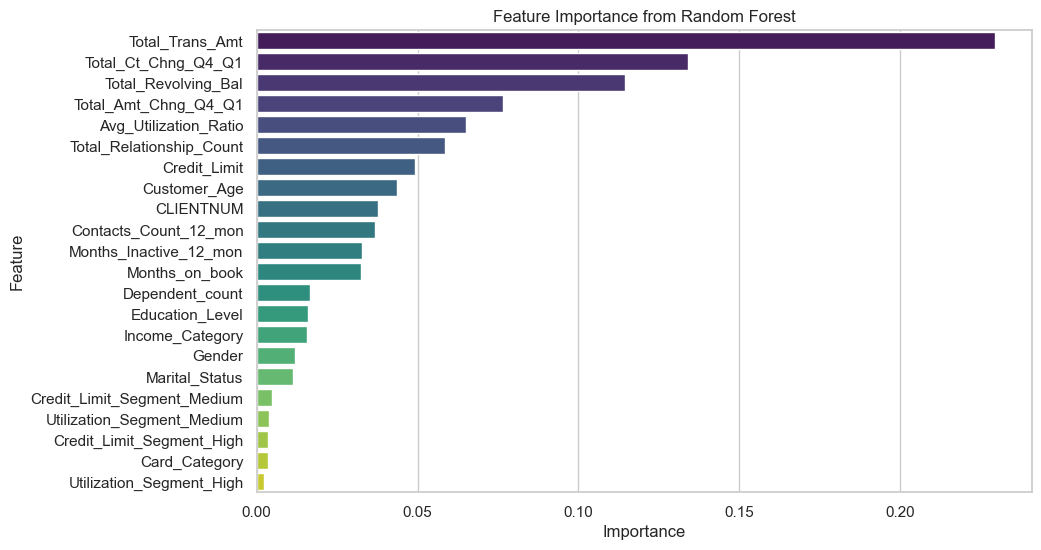

In [56]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
